In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist2d

np.random.seed(42)

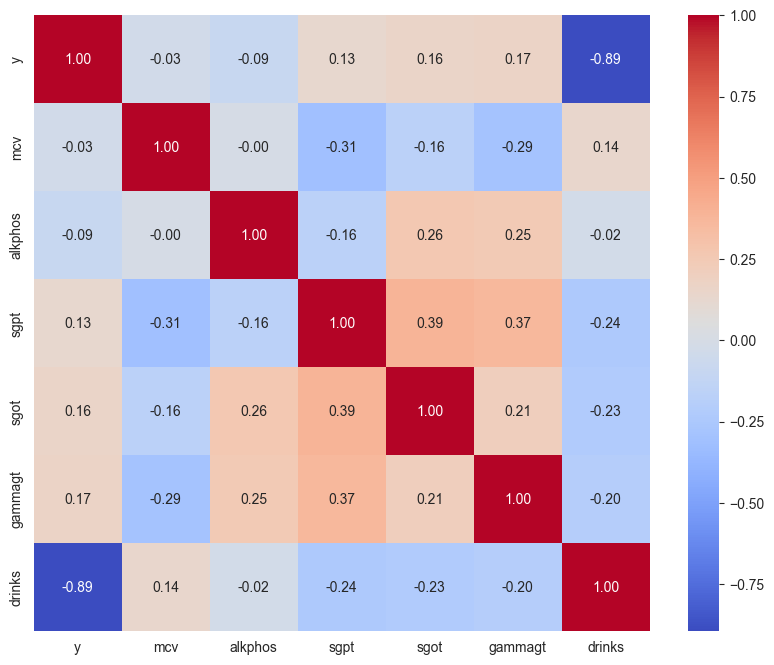

In [2]:
liver_df = pd.read_csv('liver_disorders.csv')
"""
https://www.openml.org/search?type=data&status=active&qualities.NumberOfInstances=lte_1000&id=8

BUPA liver disorders

The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.

Important note: The 7th field (selector) has been widely misinterpreted in the past as a dependent variable representing presence or absence of a liver disorder. This is incorrect [1]. The 7th field was created by BUPA researchers as a train/test selector. It is not suitable as a dependent variable for classification. The dataset does not contain any variable representing presence or absence of a liver disorder. Researchers who wish to use this dataset as a classification benchmark should follow the method used in experiments by the donor (Forsyth & Rada, 1986, Machine learning: applications in expert systems and information retrieval) and others (e.g. Turney, 1995, Cost-sensitive classification: Empirical evaluation of a hybrid genetic decision tree induction algorithm), who used the 6th field (drinks), after dichotomising, as a dependent variable for classification. Because of widespread misinterpretation in the past, researchers should take care to state their method clearly.

Attribute information
1. mcv mean corpuscular volume
2. alkphos alkaline phosphotase
3. sgpt alanine aminotransferase
4. sgot aspartate aminotransferase
5. gammagt gamma-glutamyl transpeptidase
6. drinks number of half-pint equivalents of alcoholic beverages drunk per day
7. selector field created by the BUPA researchers to split the data into train/test sets

"""

liver_df = liver_df.rename(columns={'selector': 'y'})
liver_df = liver_df[['y'] + [col for col in liver_df.columns if col != 'y']]
liver_df['y'] = liver_df['y'] - 1
#correlation matrix
corr = liver_df.corr()
#plot

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)

for i in range(13):
    liver_df[f'new_col_{i}'] = np.random.uniform(low=0,high=5, size=liver_df.shape[0])

liver_df.to_csv('liver_disorders_preprocessed.csv', index=False)

In [3]:
earthquake_df = pd.read_csv('earthquake.txt', sep=' ')
earthquake_df = earthquake_df.rename(columns={'popn': 'y'})
earthquake_df['y'] = earthquake_df['y'].apply(lambda x:  1 if x == 'explosn' else 0)
for i in range(10):
    earthquake_df[f'new_col_{i}'] = np.random.uniform(low=0,high=5, size=earthquake_df.shape[0])
for i in range(10):
    earthquake_df[f'new_col_{i+10}'] = np.random.uniform(low=0,high=1, size=earthquake_df.shape[0]) * (i+1)

earthquake_df.to_csv('earthquake_preprocessed.csv', index=False)

In [4]:
academic = pd.read_csv('academic.csv', sep=';')
"""
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. """

#count target variable
academic['Target'].value_counts()
academic = academic.rename(columns={'Target': 'y'})
academic['y'] = academic['y'].apply(lambda x:  1 if x == 'Graduate' else 0) #combining droupout and enrolled as a 0
academic = academic[['y'] + [col for col in liver_df.columns if col != 'y']]

corr = academic.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', square=True)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
academic = academic.drop(columns=to_drop)

for i in range(2500):
    academic[f'new_col_{i}'] = np.random.uniform(low=0,high=1, size=academic.shape[0])

academic.to_csv('academic_preprocessed.csv', index=False)


KeyError: "['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'new_col_0', 'new_col_1', 'new_col_2', 'new_col_3', 'new_col_4', 'new_col_5', 'new_col_6', 'new_col_7', 'new_col_8', 'new_col_9', 'new_col_10', 'new_col_11', 'new_col_12'] not in index"

In [39]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df = diabetes_df.rename(columns={'Outcome': 'y'})
diabetes_df = diabetes_df[['y'] + [col for col in diabetes_df.columns if col != 'y']]
for i in range(400):
    diabetes_df[f'new_col_{i}'] = np.random.uniform(low=0,high=1, size=diabetes_df.shape[0])
diabetes_df.to_csv('diabetes_preprocessed.csv', index=False)v

C:\Users\lukas\AppData\Local\Temp\ipykernel_25400\665907498.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  diabetes_df[f'new_col_{i}'] = np.random.uniform(low=0,high=1, size=diabetes_df.shape[0])
C:\Users\lukas\AppData\Local\Temp\ipykernel_25400\665907498.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  diabetes_df[f'new_col_{i}'] = np.random.uniform(low=0,high=1, size=diabetes_df.shape[0])
C:\Users\lukas\AppData\Local\Temp\ipykernel_25400\665907498.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usual

,y,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,new_col_0,...,new_col_390,new_col_391,new_col_392,new_col_393,new_col_394,new_col_395,new_col_396,new_col_397,new_col_398,new_col_399
0,1,6,148,72,35,0,33.6,0.627,50,0.491546,...,0.032528,0.535513,0.201509,0.100910,0.002778,0.059144,0.708491,0.452551,0.312360,0.445641
1,0,1,85,66,29,0,26.6,0.351,31,0.713955,...,0.357528,0.357550,0.723244,0.786079,0.787524,0.961501,0.814952,0.125784,0.735409,0.309418
2,1,8,183,64,0,0,23.3,0.672,32,0.000947,...,0.440305,0.043574,0.019989,0.645593,0.411242,0.416021,0.417106,0.635209,0.042332,0.866200
3,0,1,89,66,23,94,28.1,0.167,21,0.497315,...,0.266008,0.115845,0.723171,0.925594,0.674114,0.451510,0.393256,0.715598,0.955209,0.815748
4,1,0,137,40,35,168,43.1,2.288,33,0.887453,...,0.962938,0.439623,0.257544,0.374577,0.069289,0.400737,0.160414,0.200717,0.111487,0.957051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,10,101,76,48,180,32.9,0.171,63,0.432705,...,0.943832,0.996950,0.253258,0.019825,0.289708,0.047555,0.472459,0.918369,0.166541,0.335959
764,0,2,122,70,27,0,36.8,0.340,27,0.115279,...,0.223681,0.852863,0.326910,0.149231,0.083769,0.203016,0.259248,0.481082,0.883947,0.587792
765,0,5,121,72,23,112,26.2,0.245,30,0.398954,...,0.336128,0.113670,0.214445,0.410577,0.298043,0.025903,0.348396,0.137207,0.834405,0.745465
766,1,1,126,60,0,0,30.1,0.349,47,0.167519,...,0.384250,0.664551,0.352383,0.423019,0.054237,0.426938,0.855760,0.324605,0.191069,0.669856
